# Encoding,Dimentionality reduction and Feature selection 
<!-- using Allele frequency conservation   -->

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from complexcgr import CGR
from pathlib import Path
from sklearn.model_selection import train_test_split
import dask
import dask.dataframe as dd
from dask import delayed
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def label_encoding_dim_category_reduction(df_in, category_col,country):
    try:
        # Print the processing status with the DataFrame name
        print("Processing DataFrame:", country)

        X = df_in.drop(columns=['category'])  # Features
        y = df_in['category']  # Target variable

        # Split the data into a 70% training set and a 30% test set with stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=142)

        # Create new DataFrames for the training and test sets
        train_df = pd.concat([X_train, y_train], axis=1)
        test_df = pd.concat([X_test, y_test], axis=1)
        test_df.to_csv(f"{country}_test_data.csv")
        processed_data_list = []  # To store processed data for all categories
        unique_categories = train_df[category_col].unique()

        for category in unique_categories:
            category_data = train_df[train_df[category_col] == category]

            dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
            snp_data = category_data.drop(columns=dropped_columns)

            print(f"Processing category: {category}")

            # Create a custom label encoding map
            custom_encoding_map = {'N': 0, 'A': 1, 'T': 2, 'G': 3, 'C': 4}

            # Apply custom label encoding to categorical columns
            categorical_cols = snp_data.select_dtypes(include=['object']).columns
            snp_data[categorical_cols] = snp_data[categorical_cols].apply(lambda col: col.map(custom_encoding_map))

            # Calculate the frequency of each character for each SNP column
            character_frequencies = snp_data.apply(lambda x: x.value_counts().max() / len(x))

            # Set a threshold for character frequency
            frequency_threshold = 0.8

            # Identify SNP loci where a single character appears >= 80% of the time
            highly_conserved_loci = character_frequencies[character_frequencies >= frequency_threshold]

            # Get DataFrame with the filtered columns
            filtered_columns = highly_conserved_loci.index.tolist()
            df_filtered = snp_data[filtered_columns]

            # Combine non-categorical variables with informative SNP columns
            data_combined = pd.concat([category_data[dropped_columns], df_filtered], axis=1)
            processed_data_list.append(data_combined)

            # Plotting (uncomment this section if needed)
            # top_ten_conserved = df_filtered.mean().nlargest(20)
            # plt.figure(figsize=(10, 6))
            # top_ten_conserved.plot(kind='bar', color='blue')
            # plt.title(f"Top Ten Conserved SNP's in {category}")
            # plt.xlabel('genomic position of the SNP')
            # plt.ylabel('Frequency')
            # plt.xticks(rotation=45)
            # plt.tight_layout()
            # plt.savefig(f'top_ten_conserved_SNP_{category}_custom_label_encoded.png')
            # plt.show()

        concatenated_data = pd.concat(processed_data_list, ignore_index=True)

        # Save processed data
        processed_filename = f"{country}_category.csv"
        concatenated_data.to_csv(processed_filename, index=False)

        return concatenated_data
    except:
                # Print the processing status with the DataFrame name
        print("Processing DataFrame:", country)

        # Assuming 'category' is the column you want to stratify by in df_uganda
        X = df_in.drop(columns=['category'])  # Features
        y = df_in['category']  # Target variable

        # Split the data into a 70% training set and a 30% test set with stratification
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

        # Create new DataFrames for the training and test sets
        train_df = pd.concat([X_train, y_train], axis=1)
        test_df = pd.concat([X_test, y_test], axis=1)
        test_df.to_csv(f"{country}_test_data.csv")
        processed_data_list = []  # To store processed data for all categories
        unique_categories = train_df[category_col].unique()

        for category in unique_categories:
            category_data = train_df[train_df[category_col] == category]

            dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
            snp_data = category_data.drop(columns=dropped_columns)

            print(f"Processing category: {category}")

            # Create a custom label encoding map
            custom_encoding_map = {'N': 0, 'A': 1, 'T': 2, 'G': 3, 'C': 4}

            # Apply custom label encoding to categorical columns
            categorical_cols = snp_data.select_dtypes(include=['object']).columns
            snp_data[categorical_cols] = snp_data[categorical_cols].apply(lambda col: col.map(custom_encoding_map))

            # Calculate the frequency of each character for each SNP column
            character_frequencies = snp_data.apply(lambda x: x.value_counts().max() / len(x))

            # Set a threshold for character frequency
            frequency_threshold = 0.8

            # Identify SNP loci where a single character appears >= 80% of the time
            highly_conserved_loci = character_frequencies[character_frequencies >= frequency_threshold]

            # Get DataFrame with the filtered columns
            filtered_columns = highly_conserved_loci.index.tolist()
            df_filtered = snp_data[filtered_columns]

            # Combine non-categorical variables with informative SNP columns
            data_combined = pd.concat([category_data[dropped_columns], df_filtered], axis=1)
            processed_data_list.append(data_combined)

            # Plotting (uncomment this section if needed)
            # top_ten_conserved = df_filtered.mean().nlargest(20)
            # plt.figure(figsize=(10, 6))
            # top_ten_conserved.plot(kind='bar', color='blue')
            # plt.title(f"Top Ten Conserved SNP's in {category}")
            # plt.xlabel('genomic position of the SNP')
            # plt.ylabel('Frequency')
            # plt.xticks(rotation=45)
            # plt.tight_layout()
            # plt.savefig(f'top_ten_conserved_SNP_{category}_custom_label_encoded.png')
            # plt.show()

        concatenated_data = pd.concat(processed_data_list, ignore_index=True)

        # Save processed data
        processed_filename = f"{country}_category.csv"
        concatenated_data.to_csv(processed_filename, index=False)

        return concatenated_data
        

# # Example usage
# # Load your DataFrame here
# # df = pd.read_csv("your_data.csv")
# # Specify the name of the category column
# category_column_name = "CategoryName"
# label_encoding_dim_category_reduction(df, category_column_name)

In [ ]:
# 1. Uganda
df_uganda=pd.read_csv("uganda_processed.csv")
df_uganda

In [ ]:
df_ug

In [61]:
# df_uganda=df_uganda.drop(columns="Unnamed: 0")
# df_uganda

In [62]:
# df_ug=label_encoding_dim_category_reduction(df_in=df_uganda, category_col="category",country="uganda")
# df_ug

In [8]:
df_ug.to_csv("uganda_final_training1.csv",index=False)

In [78]:
# 1. ethiopia
df_ethipoia=pd.read_csv("ethiopia_processed.csv")
df_ethipoia

,Isolation source,category,BioSample,sra_accession,country,15,27,78,480,504,...,4782628,4782643,4782649,4782673,65846,294358,294396,3950416,4201527,4831514
0,feces poultry,poultry,SAMN03576822,SRR2005736,ethipia,T,A,A,G,T,...,N,N,N,N,N,N,N,N,N,N
1,feces (Bos taurus),bovine,SAMN03576821,SRR2032008,ethipia,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N
2,bovine skin,bovine,SAMN03577111,SRR3027613,ethipia,T,A,A,G,T,...,N,N,N,N,N,N,N,N,N,N
3,bovine skin,bovine,SAMN03577114,SRR3027617,ethipia,T,A,A,G,T,...,N,N,N,N,N,N,N,N,N,N
4,swine lymph node,swine,SAMN03577124,SRR3027652,ethipia,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,feces (Bos taurus),bovine,SAMN03576818,SRR9090895,ethipia,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
224,feces swine,swine,SAMN03577146,SRR9090935,ethipia,N,N,N,N,T,...,N,N,N,N,N,N,N,N,N,N
225,feces poultry,poultry,SAMN03576814,SRR9090952,ethipia,N,N,N,N,T,...,N,N,N,N,N,N,N,N,N,N
226,feces poultry,poultry,SAMN03576813,SRR9090953,ethipia,N,N,N,N,T,...,C,G,A,A,N,N,N,N,N,N


In [ ]:
df_thiopia=label_encoding_dim_category_reduction(df_in=df_ethipoia, category_col="category",country="ethiopia")
df_thiopia

Processing DataFrame: ethiopia
Processing category: bovine
Processing category: swine


In [11]:
df_thiopia.to_csv("ethiopia_final_training1.csv")

In [10]:
def category_allocation(df_data):
    # List of terms related to various categories
    bovine_terms = ['cattle stool','red meat spice rub',"feces (Bos taurus)","feces bovine",'cow','Bovine (Organ)','Bovine (Fecal)','stool (Bos taurus)','Bovine (Meat)','Bovine faeces','intestine cattle','GOAT','GOAT MEAT','cattle lung', 'cattle', 'beef', 'cattle stool (Bos taurus)']
    poultry_terms = ['poultry feed','white meat spice rub','Poultry vendoors and farms', 'chicken heart', 'Poultry small intenstine',
                     'Poultry carcass', 'chicken liver', 'Chicken Spleen', 'chicken', 'poultry water','poultry', 'Poultry meat', 'Poultry liver', 'Chicken House Swab',
       'Chicken litter',"broiler carcass swab","feces poultry",'Chicken Feces',"chicken carcass",'Chicken rectal swab','broiler chicken','Poultry (Meat)', 'Poultry (Fecal)','chicken']
    swine_terms=["feces swine","swine","swine stool","pig stool",'Swine (Organ)',"feces swine","swine feces"]
#         'red meat spice rub', 'white meat spice rub', 'meat'

    # Create the dictionary for replacement
    replacement_dict = {}
    for term in bovine_terms:
        replacement_dict[term] = 'bovine'
    for term in poultry_terms:
        replacement_dict[term] = 'poultry'
    for term in swine_terms:
        replacement_dict[term] = 'swine'

    # Function to replace terms based on the dictionary
    def replace_terms(description):
        for term, replacement in replacement_dict.items():
            if term in description:
                return replacement
        return description

    # Create the 'category' column using apply
    df_data['category'] = df_data['Isolation source'].apply(replace_terms)

    # Reorder the columns to insert 'category' as the second column
    column_order = ['Isolation source', 'category'] + [col for col in df_data.columns if col != 'Isolation source' and col != 'category']
    df_new = df_data[column_order]

    return df_new
df_kenya=pd.read_csv("kenya_processed.csv",low_memory=False)
df_kenya=category_allocation(df_kenya)

In [11]:
df_kenya=df_kenya.drop(columns=["Unnamed: 0.1","Unnamed: 0"])
df_kenya

,Isolation source,category,BioSample,sra_accession,country,15,27,78,480,504,...,4839562,4841514,4841563,4843995,4851006,4853017,4855381,20462,65978,2914287
0,feces swine,swine,SAMN03576958,SRR2163243,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
1,feces swine,swine,SAMN03576962,SRR2163246,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
2,feces swine,swine,SAMN03576963,SRR2163247,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
3,feces swine,swine,SAMN03576956,SRR2163254,kenya,T,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
4,feces swine,swine,SAMN03576959,SRR2163255,kenya,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,feces swine,swine,SAMN03577020,SRR2981160,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
69,feces swine,swine,SAMN03577015,SRR2981161,kenya,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N
70,feces swine,swine,SAMN03577005,SRR2981162,kenya,N,A,N,G,N,...,N,N,N,N,N,N,N,N,N,N
71,feces swine,swine,SAMN03577026,SRR3272062,kenya,N,N,N,G,N,...,N,N,N,N,N,N,N,N,N,N


In [14]:
# %%time
# # kenya
# df_kenya=pd.read_csv("kenya_processed.csv")

In [ ]:

df_kenya=label_encoding_dim_category_reduction(df_in=df_kenya, category_col="category",country="kenya")
df_kenya
df_kenya.to_csv("kenya_final_training1.csv")

Processing DataFrame: kenya
Processing category: swine


In [ ]:
df_kenya.fillna(0).to_csv("kenya_final_training1.csv")

In [ ]:
df_tanzania=pd.read_csv("tanzania_processed.csv")
category=["bovine","swine","poultry"]
df_tanzania=df_tanzania[df_tanzania["category"].isin(category)]
df_tanzania

In [ ]:
%%time
df_tanzania=label_encoding_dim_category_reduction(df_in=df_tanzania, category_col="category",country="tanzania")
df_tanzania=df_tanzania.fillna(0)
df_tanzania
df_tanzania.to_csv("tanzania_final_training1.csv")

In [ ]:
# def label_encoding_dim_category_reduction_sa(df_in, category_col,country):
    
#     # Assuming 'category' is the column you want to stratify by in df_uganda
#     X = df_in.drop(columns=['category'])  # Features
#     y = df_in['category']  # Target variable

#     # Split the data into a 70% training set and a 30% test set with stratification
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

#     # Create new DataFrames for the training and test sets
#     train_df = pd.concat([X_train, y_train], axis=1)
#     test_df = pd.concat([train_df, y_test], axis=1)
#     test_df.to_csv(f"{country}_test_data.csv")
#     processed_data_list = []  # To store processed data for all categories
#     unique_categories = train_df[category_col].unique()
    
#     for category in unique_categories:
#         category_data = df_in[df_in[category_col] == category]
        
#         dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
#         snp_data = category_data.drop(columns=dropped_columns)
        
#         print(f"Processing category: {category}")
        
#         # Create a custom label encoding map
#         custom_encoding_map = {'N': 0, 'A': 1, 'T': 2, 'G': 3, 'C': 4}
    
#         # Apply custom label encoding to categorical columns
#         categorical_cols = snp_data.select_dtypes(include=['object']).columns
#         snp_data[categorical_cols] = snp_data[categorical_cols].apply(lambda col: col.map(custom_encoding_map))
    
#         # Calculate the frequency of each character for each SNP column
#         character_frequencies = snp_data.apply(lambda x: x.value_counts().max() / len(x))
        
#         # Set a threshold for character frequency
#         frequency_threshold = 0.8
        
#         # Identify SNP loci where a single character appears >= 80% of the time
#         highly_conserved_loci = character_frequencies[character_frequencies >= frequency_threshold]
        
#         # Get DataFrame with the filtered columns
#         filtered_columns = highly_conserved_loci.index.tolist()
#         df_filtered = snp_data[filtered_columns]

#         # Combine non-categorical variables with informative SNP columns
#         data_combined = pd.concat([category_data[dropped_columns], df_filtered], axis=1)
#         processed_data_list.append(data_combined)
        
#         # Plotting (uncomment this section if needed)
#         # top_ten_conserved = df_filtered.mean().nlargest(20)
#         # plt.figure(figsize=(10, 6))
#         # top_ten_conserved.plot(kind='bar', color='blue')
#         # plt.title(f"Top Ten Conserved SNP's in {category}")
#         # plt.xlabel('genomic position of the SNP')
#         # plt.ylabel('Frequency')
#         # plt.xticks(rotation=45)
#         # plt.tight_layout()
#         # plt.savefig(f'top_ten_conserved_SNP_{category}_custom_label_encoded.png')
#         # plt.show()

#     concatenated_data = pd.concat(processed_data_list, ignore_index=True)
    
#     # Save processed data
#     processed_filename = f"{country}_category.csv"
#     concatenated_data.to_csv(processed_filename, index=False)
    
#     return concatenated_data

# # # Example usage
# # # Load your DataFrame here
# # # df = pd.read_csv("your_data.csv")
# # # Specify the name of the category column
# # category_column_name = "CategoryName"
# # label_encoding_dim_category_reduction(df, category_column_name)

In [ ]:
df_tanzania

In [ ]:
%%time
# kenya
df_sa=pd.read_csv("south_africa_processed.csv")

In [ ]:
df_sa=label_encoding_dim_category_reduction(df_in=df_sa, category_col="category",country="south_africa")
df_sa
df_sa.fillna(0).to_csv("south_africa_final_training1.csv")
df_sa

In [ ]:
%%time
# kenya
df_mauritias=pd.read_csv("mauritias_processed.csv")

In [ ]:
df_mauritias=label_encoding_dim_category_reduction(df_in=df_mauritias, category_col="category",country="mauritias")
df_mauritias
df_mauritias.fillna(0).to_csv("mauritias_final_training1.csv")

In [ ]:
%%time
# kenya
df_senegal=pd.read_csv("senegal_processed.csv")


In [ ]:
df_senegal=label_encoding_dim_category_reduction(df_in=df_senegal, category_col="category",country="senegal")
df_senegal
df_senegal.fillna(0).to_csv("senegal_final_training1.csv")

In [ ]:
%%time
# kenya
df_tunisia=pd.read_csv("../data/tunisia_processed.csv")

In [ ]:
df_tunisia=label_encoding_dim_category_reduction(df_in=df_tunisia, category_col="category",country="tunisia")
df_tunisia
df_tunisia.fillna(0).to_csv("tunisia_final_training1.csv")

In [ ]:
%%time
# kenya
df_nigeria_poultry=pd.read_csv("../data/nigeria_poultry_metadata.csv")

In [ ]:
df_nigeria_poultry=label_encoding_dim_category_reduction(df_in=df_nigeria_poultry, category_col="category",country="nigeria_poultry")
df_nigeria_poultry
df_nigeria_poultry.fillna(0).to_csv("nigeria_poultry_final_training1.csv")

In [ ]:
%%time
# kenya
df_nigeria_swine=pd.read_csv("../data/nigeria_pig_metadata.csv")

In [ ]:
df_nigeria_swine=label_encoding_dim_category_reduction(df_in=df_nigeria_swine, category_col="category",country="nigeria_swine")
df_nigeria_swine
df_nigeria_swine.fillna(0).to_csv("nigeria_swine_final_training1.csv")

In [ ]:
%%time
# kenya
df_nigeria_bovine=pd.read_csv("../data/nigeria_bovine_metadata.csv")

In [52]:
%%time
df_nigeria_bovine=label_encoding_dim_category_reduction(df_in=df_nigeria_bovine, category_col="category",country="nigeria_bovine")
df_nigeria_bovine
df_nigeria_bovine.fillna(0).to_csv("nigeria_bovine_final_training1.csv")

Processing DataFrame: nigeria_bovine
Processing category: bovine
CPU times: user 2h 6min 24s, sys: 24.7 s, total: 2h 6min 49s
Wall time: 2h 6min 38s


In [53]:
%%time
# kenya
df_human=pd.read_csv("human_cat_sa_processed.csv")

CPU times: user 7min 4s, sys: 3.72 s, total: 7min 8s
Wall time: 7min 8s


In [ ]:
df_human=label_encoding_dim_category_reduction(df_in=df_human, category_col="category",country="south_africa_human")
df_human
df_human.fillna(0).to_csv("south_africa_human_final_training1.csv")

Processing DataFrame: south_africa_human
Processing category: human


In [15]:
%%time
# kenya
df_tunisia_human=pd.read_csv("human_tunisia_processed1.csv")

CPU times: user 1min 10s, sys: 990 ms, total: 1min 11s
Wall time: 1min 11s


In [16]:
df_tunisia_human=df_tunisia_human.rename(columns={'Location': 'country'})


In [17]:
df_tunisia_human

,Isolation source,category,BioSample,country,sra_accession,480,534,646,793,796,...,4123656,4123662,4579496,4579502,4579505,4579510,4579534,4579549,4579550,4579551
0,human,human,SAMN33426578,Tunisia,SRR23603204,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
1,human,human,SAMN33426577,Tunisia,SRR23603215,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
2,human,human,SAMN33426576,Tunisia,SRR23603226,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
3,human,human,SAMN33426575,Tunisia,SRR23603237,G,C,T,N,N,...,N,N,N,N,N,N,N,N,N,N
4,human,human,SAMN33426620,Tunisia,SRR23603246,G,C,T,N,N,...,N,N,N,N,N,N,N,N,N,N
5,human,human,SAMN33426619,Tunisia,SRR23603247,G,C,N,N,N,...,N,N,N,N,N,N,N,N,N,N
6,human,human,SAMN33426574,Tunisia,SRR23603248,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
7,human,human,SAMN33426618,Tunisia,SRR23603249,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N
8,human,human,SAMN33426617,Tunisia,SRR23603250,G,C,T,C,N,...,N,N,N,N,N,N,N,N,N,N
9,human,human,SAMN33426616,Tunisia,SRR23603251,G,C,T,C,T,...,N,N,N,N,N,N,N,N,N,N


In [18]:
%%time
df_tunisia_human=label_encoding_dim_category_reduction(df_in=df_tunisia_human, category_col="category",country="tunisia_human")
df_tunisia_human
df_tunisia_human.fillna(0).to_csv("tunisa_human_final_training1.csv")

Processing DataFrame: tunisia_human
Processing category: human
CPU times: user 38min 28s, sys: 18.3 s, total: 38min 47s
Wall time: 38min 41s


In [59]:
df_all=[df_ug,df_ethipoia,df_kenya,df_tanzania,df_sa,df_mauritias,df_senegal,df_tunisia,df_nigeria_swine,df_nigeria_poultry,df_nigeria_bovine,df_tunisia_human,df_human]
len(df_all)

13

In [ ]:
b

In [58]:
%%time
#Read all dataframes processed
df_uganda=pd.read_csv("uganda_final_training1.csv",low_memory=False)
df_kenya=pd.read_csv("kenya_final_training1.csv",low_memory=False)
df_tanzania=pd.read_csv("tanzania_final_training1.csv",low_memory=False)
df_ethiopia=pd.read_csv("ethiopia_final_training1.csv",low_memory=False)
df_south_africa=pd.read_csv("south_africa_final_training1.csv",low_memory=False)
df_tunisia=pd.read_csv("tunisia_final_training1.csv",low_memory=False)
df_sennegal=pd.read_csv("senegal_final_training1.csv",low_memory=False)
df_mauritias=pd.read_csv("mauritias_final_training1.csv",low_memory=False)
df_nigeria_swine=pd.read_csv("nigeria_swine_final_training1.csv",low_memory=False)
df_nigeria_poultry=pd.read_csv("nigeria_poultry_final_training1.csv",low_memory=False)
df_nigeria_bovine=pd.read_csv("nigeria_bovine_final_training1.csv",low_memory=False)
# df_tunisia_human=pd.read_csv("tunisa_human_final_training1.csv",low_memory=False)
# df_south_africa_human=pd.read_csv("south_africa_human_final_training1.csv",low_memory=False)

CPU times: user 1min 2s, sys: 1.19 s, total: 1min 3s
Wall time: 1min 3s


In [15]:
# df_south_africa_human=pd.read_csv("south_africa_human_final_training1.csv",low_memory=False)

In [59]:
%%time
# merge all dataframes
df_all=[df_uganda,df_kenya,df_tanzania,df_ethiopia,df_south_africa,df_tunisia,df_sennegal,df_mauritias,df_nigeria_swine,df_nigeria_poultry,df_nigeria_bovine,df_tunisia_human,df_south_africa_human]

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 20.7 µs


In [60]:
%%time
df_all_final=pd.concat(df_all)
df_all_final

CPU times: user 4min 56s, sys: 12.1 s, total: 5min 8s
Wall time: 5min 8s


,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,1410,...,4306200,4460406,4472314,4704393,4790470,4253868,912091,1378733,1769492,2745698
0,poultry,poultry,SAMN06238269,SRR5280385,uganda,0.0,3.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,poultry,poultry,SAMN06238275,SRR5278820,uganda,4.0,3.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,poultry,poultry,SAMN06238271,SRR5278818,uganda,0.0,3.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,poultry,poultry,SAMN06238274,SRR5278813,uganda,0.0,3.0,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,poultry,poultry,SAMN06240032,SRR5231989,uganda,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,human,human,SAMEA7176486,ERR4451352,human_south_africa,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,human,human,SAMEA13423149,ERR9287926,human_south_africa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,human,human,SAMEA13423185,ERR9287961,human_south_africa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,human,human,SAMEA7176412,ERR4451279,human_south_africa,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


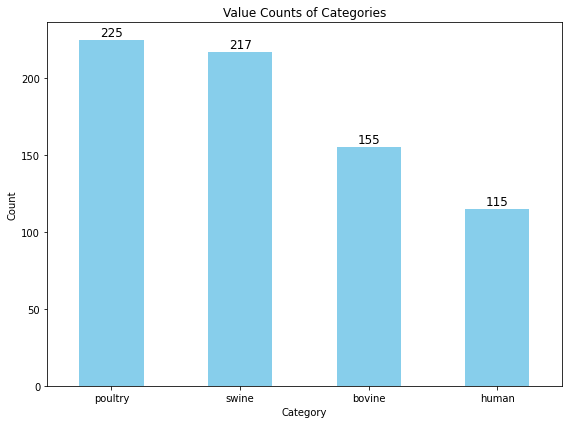

<Figure size 432x288 with 0 Axes>

In [18]:
# Training data distribution
# Calculate value counts
category_counts = df_all_final['category'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the bar plot
ax = category_counts.plot(kind='bar', color='skyblue')

plt.title('Value Counts of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add data labels on top of each bar
for i, v in enumerate(category_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()  # Adjust layout for better readability

plt.show()  # Display the plot
plt.savefig("../figures/training_data_distribution.png")

In [19]:
%%time
df_all_final=df_all_final.fillna(0)

CPU times: user 38.1 s, sys: 8.44 s, total: 46.6 s
Wall time: 46.7 s


In [20]:
df_all_final

,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,1410,...,4306200,4460406,4472314,4704393,4790470,4253868,912091,1378733,1769492,2745698
0,poultry,poultry,SAMN06238269,SRR5280385,uganda,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,poultry,poultry,SAMN06238275,SRR5278820,uganda,4.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,poultry,poultry,SAMN06238271,SRR5278818,uganda,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,poultry,poultry,SAMN06238274,SRR5278813,uganda,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,poultry,poultry,SAMN06240032,SRR5231989,uganda,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,human,human,SAMEA7176486,ERR4451352,human_south_africa,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,human,human,SAMEA13423149,ERR9287926,human_south_africa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,human,human,SAMEA13423185,ERR9287961,human_south_africa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,human,human,SAMEA7176412,ERR4451279,human_south_africa,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# %%time
# # Get the list of unique categories
# unique_categories = df_all_final['category'].unique()

# # Create a dictionary to store the filtered DataFrames for each category
# filtered_dfs = {}

# # Loop through each category
# for category in unique_categories:
#     # Filter the DataFrame for the current category
#     category_df = df_all_final[df_all_final['category'] == category]
    
#     # Count the SNP frequency per column (excluding the 'category' column)
#     snp_counts = category_df.drop(columns=['category']).sum()
    
#     # Identify SNPs that occur only once (unique to the current category)
#     unique_snps = snp_counts[snp_counts == 1].index.tolist()
    
#     # Filter the DataFrame to retain only unique SNPs for the current category
#     category_filtered_df = category_df[['category'] + unique_snps]
    
#     # Store the filtered DataFrame in the dictionary
#     filtered_dfs[category] = category_filtered_df

# # Now, 'filtered_dfs' contains the filtered DataFrames for each category


In [22]:
# # new = pd.DataFrame.from_dict(filtered_dfs)
# pultry=filtered_dfs.get("poultry")
# bovine=filtered_dfs.get("bovine")
# swine=filtered_dfs.get("swine")
# human=filtered_dfs.get("human")

# p=pultry.columns.to_list()
# b=bovine.columns.to_list()
# s=swine.columns.to_list()
# h=human.columns.to_list()
# all_list=p+b+s+h
# all_list=all_list
# # len(all_list)
# # pultry["588401"].value_counts()

In [23]:
# all_list.remove("category")

In [24]:
# new_list = [item for item in all_list if item != "category"]

In [25]:
# df_all_fina_new=df_all_final.drop(columns=new_list)
# df_all_fina_new

In [26]:
# po=df_all_fina_new.groupby("category").get_group("poultry")
# po                                    

In [27]:
# bo=df_all_fina_new.groupby("category").get_group("bovine")
# bo                             

In [28]:
# sw=df_all_fina_new.groupby("category").get_group("swine")
# sw                            

In [29]:
# hu=df_all_fina_new.groupby("category").get_group("human")
# hu                            

In [30]:
# print(sw["480"].value_counts())
# print(bo["480"].value_counts())
# print(po["480"].value_counts())
# print(hu["480"].value_counts())

In [31]:
# # check unique columns by category
# sw_trial=sw[["305245","2027584"]]
# bo_trial=bo[["305245","2027584"]]
# po_trial=po[["305245","2027584"]]
# hu_trial=hu[["305245","2027584"]]
# hu_trial

In [32]:
# import pandas as pd

# # Define a threshold for considering a column as associated with a category
# threshold = 0.5

# # Define a list of your dataframes and their corresponding categories
# dataframes = [sw, bo, po, hu]
# categories = ["swine", "bovine", "poultry", "human"]

# # Define the SNP positions you want to check
# snp_positions = ["305245", "2027584"]  # Add other SNP positions as needed

# # Create an empty list to store the individual results
# results = []

# # Iterate through SNP positions
# for snp_position in snp_positions:
#     associated_category = None
#     unique_value_count = {}
    
#     # Iterate through each dataframe (category)
#     for df, category in zip(dataframes, categories):
#         # Check if the SNP position exists in the dataframe
#         if snp_position in df.columns:
#             # Calculate the unique value counts for the SNP position
#             unique_values = df[snp_position].unique()
#             unique_value_count[category] = len(unique_values)
    
#     # Check if there is a category with a unique count for each allele (0.0 and 4.0)
#     if "swinw" in unique_value_count and unique_value_count["swinw"] == 2:
#         associated_category = "swinw"
    
#     # Check if the SNP position is associated with the category
#     if associated_category is not None:
#         results.append({"SNP Position": snp_position, "Category": associated_category})

# # Create a DataFrame from the results list
# results_df = pd.DataFrame(results)

# # Display the results
# print(results_df)


In [33]:
# Shuffle the dataframe
df_shuffle = df_all_final.sample(frac=1, random_state=142)
df_shuffle

,Isolation source,category,BioSample,sra_accession,country,23,480,534,646,1410,...,4306200,4460406,4472314,4704393,4790470,4253868,912091,1378733,1769492,2745698
49,feces swine,swine,SAMN03576991,SRR2847938,kenya,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,chicken carcass,poultry,SAMN03577271,SRR3115981,ethipia,0.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,feces swine,swine,SAMN03577149,SRR3134909,ethipia,0.0,0.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,pig stool,swine,SAMN07135217,SRR6951172,nigeria,0.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,poultry,poultry,SAMN06240034,SRR5232014,uganda,0.0,3.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,feces poultry,poultry,SAMN03577373,SRR6411078,ethipia,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,chicken,poultry,SAMN02368606,SRR1106456,nigeria,0.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,pig stool,swine,SAMN07135265,SRR6950720,nigeria,4.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,feces swine,swine,SAMN03577204,SRR3088941,ethipia,0.0,0.0,4.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# %%time
# df_all_final=df_all_final.fillna(0).to_csv("final_training_data1_complete",index=False)

In [35]:
%%time
dropped_columns = ['Isolation source', 'category', 'BioSample', 'sra_accession', 'country','Unnamed: 0']
X= df_shuffle.drop(columns=dropped_columns)

CPU times: user 25.1 s, sys: 3.23 s, total: 28.4 s
Wall time: 28.3 s


In [36]:
from sklearn.preprocessing import LabelEncoder
# Merge all dfs
y=df_shuffle["category"]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 1, 1, 1, 1,
       3, 0, 2, 0, 3, 2, 2, 2, 0, 3, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 3, 3,
       2, 1, 1, 2, 0, 3, 3, 0, 3, 3, 1, 1, 0, 2, 1, 3, 2, 2, 2, 0, 3, 3,
       1, 2, 1, 3, 2, 0, 1, 2, 2, 2, 3, 3, 2, 2, 0, 1, 3, 2, 2, 0, 0, 3,
       2, 0, 1, 1, 2, 1, 2, 3, 2, 0, 0, 3, 3, 3, 0, 1, 3, 3, 0, 1, 2, 3,
       0, 2, 2, 2, 3, 3, 3, 0, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 1, 0, 0, 1,
       3, 2, 3, 2, 2, 2, 0, 3, 2, 2, 0, 0, 3, 1, 1, 0, 0, 3, 3, 0, 0, 2,
       3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 2, 0, 3, 3, 2, 2, 3, 1, 0, 3, 0, 0,
       2, 2, 2, 0, 2, 3, 0, 0, 2, 1, 1, 2, 3, 3, 0, 3, 0, 1, 3, 3, 2, 3,
       0, 2, 0, 2, 2, 0, 1, 3, 2, 3, 0, 2, 0, 3, 3, 3, 3, 2, 0, 2, 3, 1,
       0, 3, 2, 2, 3, 3, 2, 1, 2, 3, 1, 1, 1, 2, 3, 3, 0, 2, 3, 0, 3, 0,
       3, 0, 2, 3, 3, 2, 3, 0, 0, 1, 0, 2, 3, 1, 1, 3, 2, 2, 3, 3, 2, 0,
       2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 2, 2, 0, 3, 2, 3, 0, 2, 3, 2, 0, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0,

In [37]:
%%time
# Oversampling
from imblearn.over_sampling import SMOTE
# Instantiate the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=142)  

# Apply SMOTE to oversample the minority class
X_over, y_over = smote.fit_resample(X, y_encoded)

CPU times: user 4min 15s, sys: 40.9 s, total: 4min 56s
Wall time: 4min 40s


In [38]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler class
rus = RandomUnderSampler(sampling_strategy='auto', random_state=142)

# Apply random undersampling to the majority class
X_under, y_under = rus.fit_resample(X, y_encoded)


# Feature Selection

##  Chisquare test

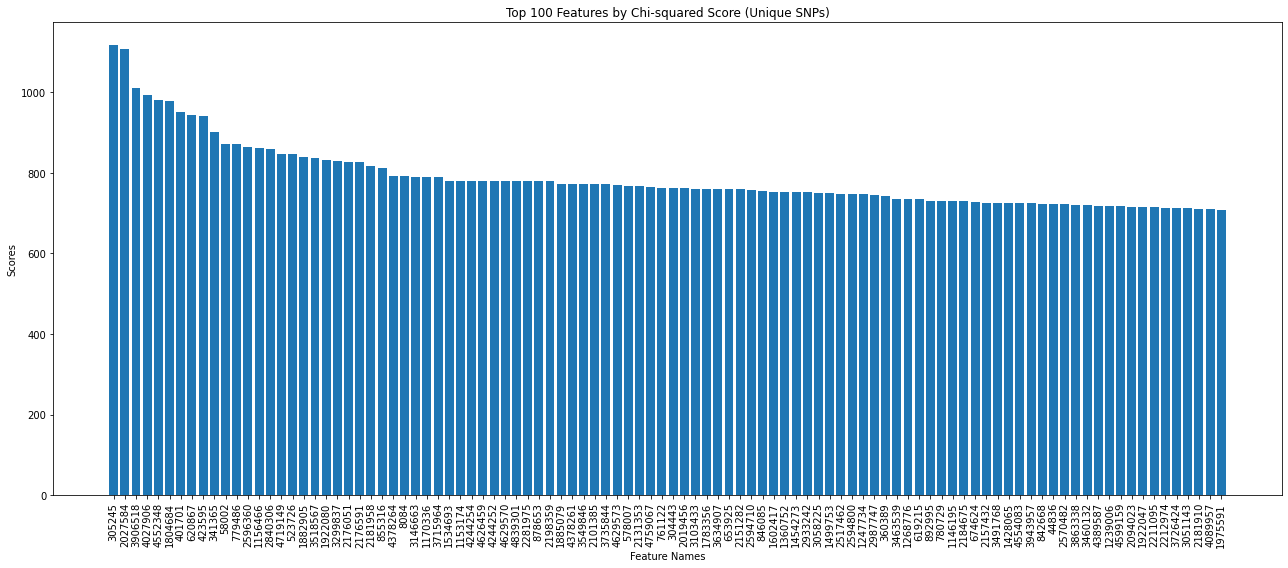

CPU times: user 1min 4s, sys: 4.12 s, total: 1min 8s
Wall time: 1min 4s


<Figure size 432x288 with 0 Axes>

In [39]:
%%time
#boniferrrori correction
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have your data X and target variable y
# Initialize the SelectKBest feature selector
sf = SelectKBest(chi2, k='all')

# Fit the feature selector to your data
sf_fit = sf.fit(X_under, y_under)

# Calculate the Bonferroni-corrected significance threshold
desired_familywise_error_rate = 0.05
total_tests = len(X_under.columns)
bonferroni_threshold = desired_familywise_error_rate / total_tests

# Get p-values for each SNP
p_values = sf_fit.pvalues_

# Select SNPs that pass the Bonferroni correction
significant_snps = X_under.columns[p_values < bonferroni_threshold]

# Create a DataFrame to hold the feature names and their scores
feature_scores = pd.DataFrame({'Feature': X_under.columns, 'Score': sf_fit.scores_})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Keep track of selected SNP names to avoid duplicates
selected_snps = set()

# Select the top 100 features with unique scores
top_features = []
for index, row in feature_scores.iterrows():
    snp_name = row['Feature']
    if snp_name in significant_snps and snp_name not in selected_snps and len(top_features) < 100:
        selected_snps.add(snp_name)
        top_features.append(row)

# Create a bar plot for the top features
top_features = pd.DataFrame(top_features)
plt.figure(figsize=(18, 8))
plt.bar(top_features['Feature'], top_features['Score'])
plt.xlabel('Feature Names')
plt.ylabel('Scores')
plt.title('Top 100 Features by Chi-squared Score (Unique SNPs)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig("final_features_chsquare_oversampling_100.png")

In [40]:
top_features.to_csv("top_100_features_chisquare_final_undersampled_100.csv",index=False)

In [41]:
sq=top_features["Feature"].to_list()
category=['Isolation source', 'category', 'BioSample', 'sra_accession', 'country']
df_training_chsq=df_shuffle[category+sq]
df_training_chsq.to_csv("chisquare_training_features_100_final_undersampled_100.csv",index=False)
df_training_chsq

,Isolation source,category,BioSample,sra_accession,country,305245,2027584,3906518,4027906,4552348,...,4599159,2094023,1922047,2211095,2212974,3726424,3051143,2181910,4089957,1975591
49,feces swine,swine,SAMN03576991,SRR2847938,kenya,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
142,chicken carcass,poultry,SAMN03577271,SRR3115981,ethipia,4.0,0.0,0.0,4.0,4.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
46,feces swine,swine,SAMN03577149,SRR3134909,ethipia,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0,4.0
16,pig stool,swine,SAMN07135217,SRR6951172,nigeria,4.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0
31,poultry,poultry,SAMN06240034,SRR5232014,uganda,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,feces poultry,poultry,SAMN03577373,SRR6411078,ethipia,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,chicken,poultry,SAMN02368606,SRR1106456,nigeria,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,pig stool,swine,SAMN07135265,SRR6950720,nigeria,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,4.0
77,feces swine,swine,SAMN03577204,SRR3088941,ethipia,4.0,4.0,0.0,4.0,4.0,...,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,4.0,4.0


# Correlation analysis

Dropped Features: ['1156466', '2840306', '1922080', '2176591', '2181958', '8084', '1170336', '3715964', '1153174', '4244254', '4626459', '4244252', '4629570', '4839301', '2281975', '878653', '2198359', '1885079', '4378261', '3549846', '2101385', '3735844', '4629573', '578007', '2131353', '761122', '1783356', '3634907', '653925', '1360752', '1454273', '2517462', '2594800', '1247734', '360389', '3463539', '1268776', '619215', '780729', '1146195', '3491768', '1428065', '3943957', '2570482', '3863338', '3460132', '4389587', '4599159', '2094023', '3726424', '1975591']


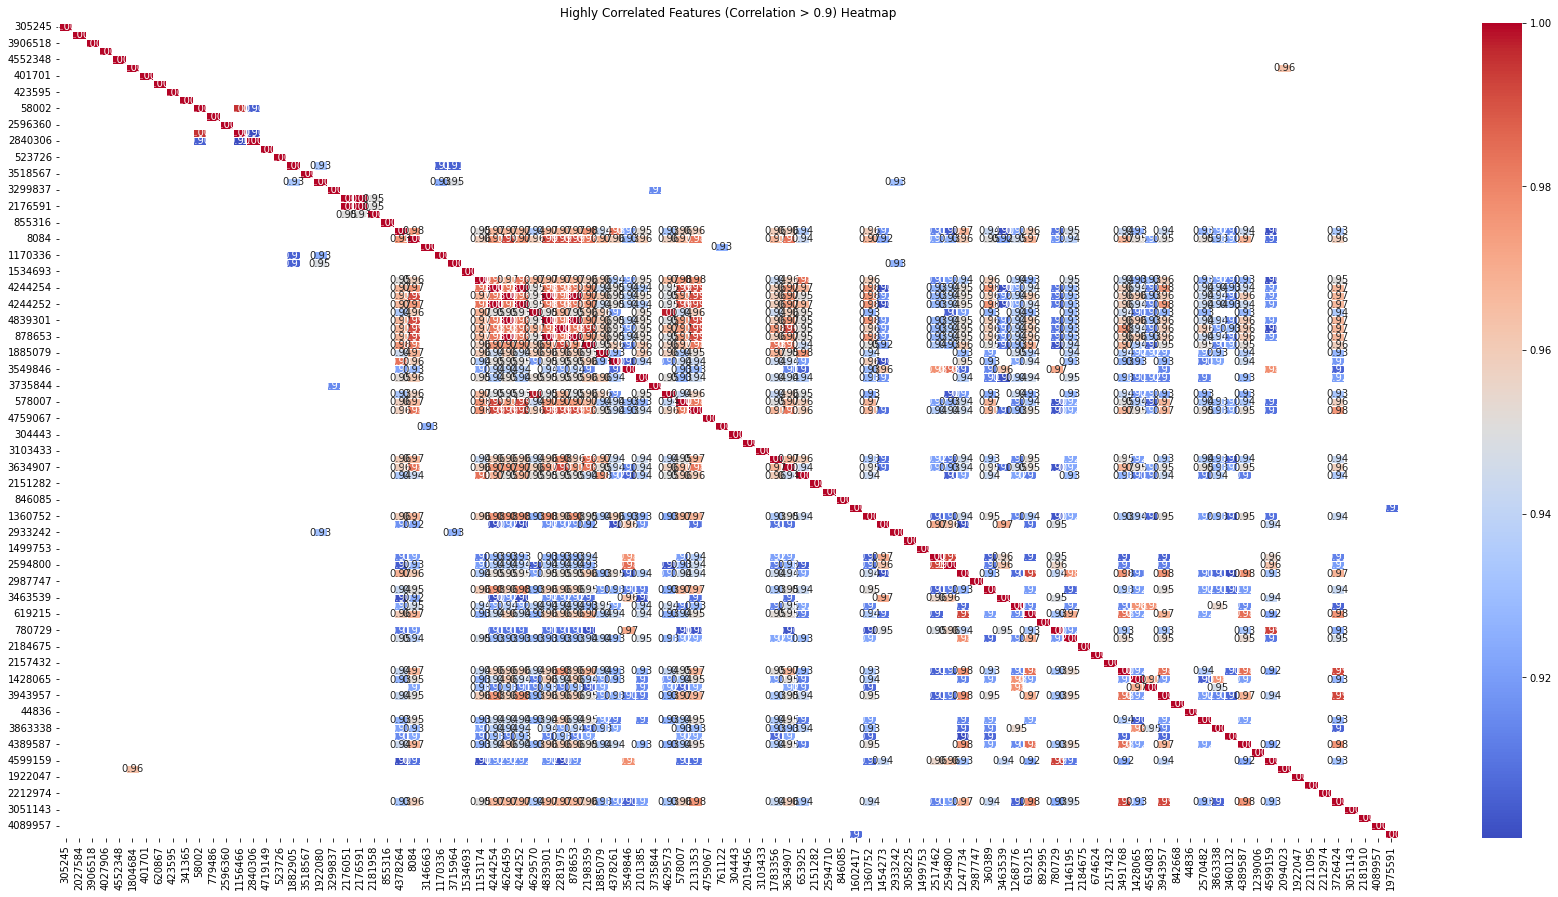

In [50]:
import pandas as pd
import numpy as np
X_new=df_training_chsq[sq]

# Calculate the correlation matrix
correlation_matrix = X_new.corr()

# Create a mask to identify pairs with correlation > 0.9
mask = np.abs(correlation_matrix) >= 0.9

# Get the indices of the correlated pairs
correlated_pairs = np.argwhere(mask)

# Create a set to store the indices of features to drop
indices_to_drop = set()

# Iterate through correlated pairs and drop one feature from each pair
for i, j in correlated_pairs:
    if i != j and i not in indices_to_drop and j not in indices_to_drop:
        # Drop feature j (you can choose i if you prefer)
        indices_to_drop.add(j)

# Drop the identified features by their indices
X_filtered = X_new.drop(X_new.columns[list(indices_to_drop)], axis=1)

# Print the names of the dropped features
dropped_feature_names = [X_new.columns[i] for i in indices_to_drop]
print("Dropped Features:", dropped_feature_names)
X_filtered
# Create a mask to identify pairs with correlation > 0.9
mask = np.abs(correlation_matrix) >= 0.9

# Create a heatmap of the highly correlated features
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix[mask], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Highly Correlated Features (Correlation > 0.9) Heatmap')
plt.show()

In [57]:
metadata=df_shuffle[category]

df_final_new=pd.concat([metadata,X_filtered],axis=1)
df_final_new.to_csv("chisquare_training_features_100_final_undersampled_no_corr.csv",index=False)